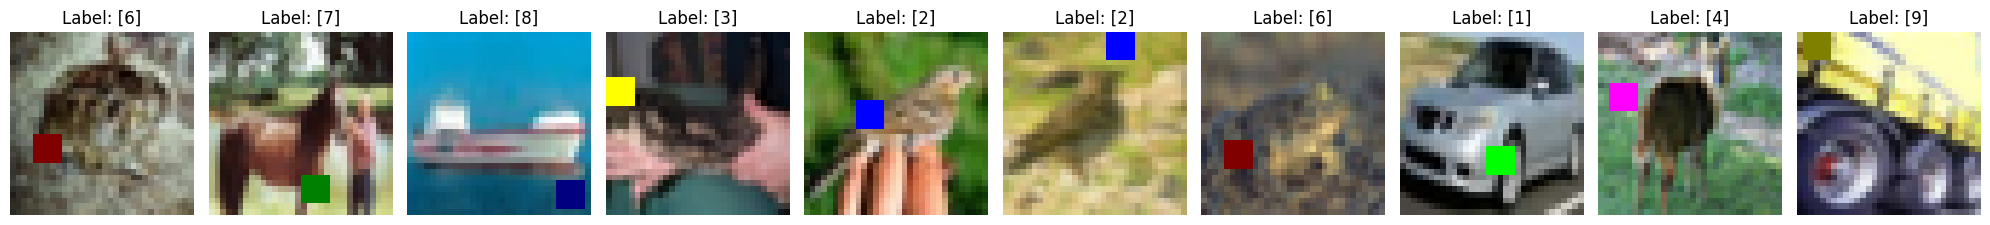

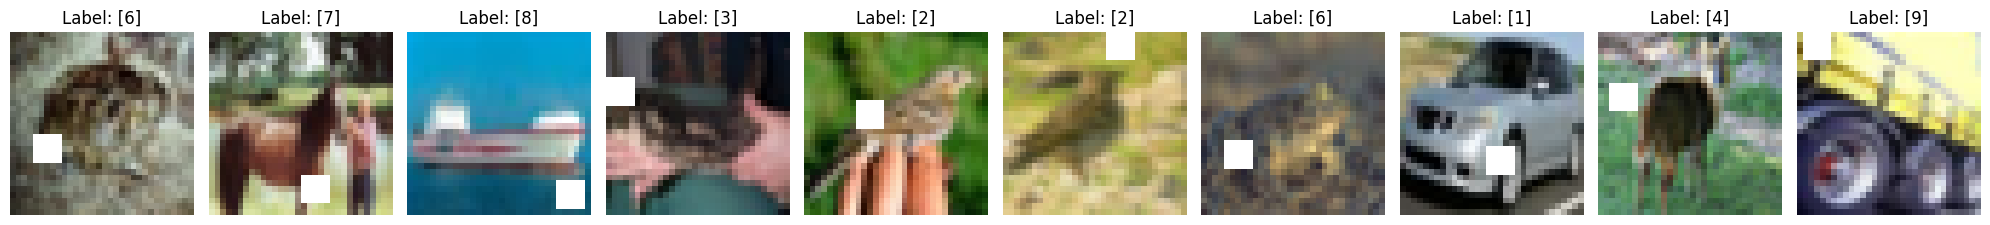

Addestramento su immagini ORIGINALI

Accuracy su validation set
0.3369

Accuracy su test set:
0.3411

Addestramento su immagini PULITE

Accuracy su validation set:
0.4796

Confronto tra accuracy su validation set:
Originali: 0.3369 vs Pulite: 0.4796

Prestazioni su test set con immagini PULITE (modello base):
Matrice di confusione:
 [[619  49  24  33  39   9  26  21 117  63]
 [ 48 574   6  36  16   8  24  25  68 195]
 [111  25 248 125 178  55 133  72  20  33]
 [ 56  21  45 374  69 140 143  66  24  62]
 [ 70  19  64  91 402  37 159 100  23  35]
 [ 35  18  55 275  98 289  87  84  24  35]
 [ 19  22  32 104 114  41 595  25  12  36]
 [ 56  24  28  78 100  51  49 517  16  81]
 [135  79  11  37  22  26  10  11 595  74]
 [ 40 172   8  30  15  15  30  32  62 596]]

Accuracy:  0.4809
Precision: 0.4825
Recall:    0.4809
F1 Score:  0.4748

Report dettagliato per classe:
               precision    recall  f1-score   support

           0       0.52      0.62      0.57      1000
           1       

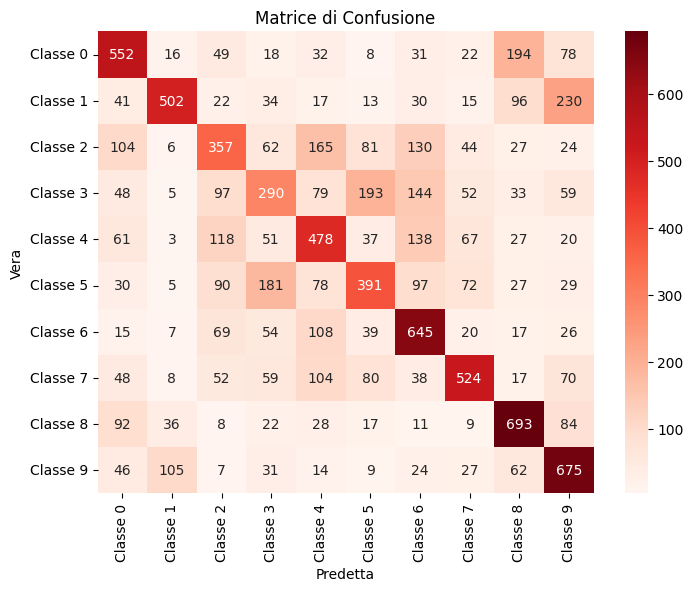


Immagini con label vera a confronto con la predizione: 


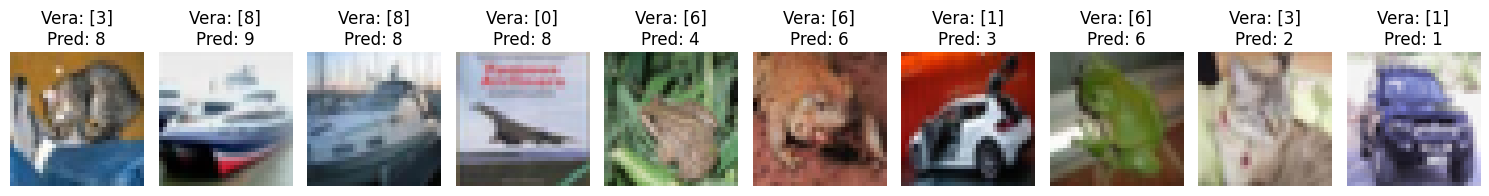

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

def rimuovi_quadrati_uniformi_5x5(immagini, soglia_varianza=0.1):
    immagini_modificate = immagini.copy()
    blocco_dim = 5

    for idx in range(immagini.shape[0]):
        img = immagini_modificate[idx]

        for y in range(0, img.shape[0] - blocco_dim + 1):
            for x in range(0, img.shape[1] - blocco_dim + 1):
                patch = img[y:y+blocco_dim, x:x+blocco_dim]
                varianza = np.var(patch.reshape(-1, 3), axis=0)

                if np.all(varianza < soglia_varianza):
                    img[y:y+blocco_dim, x:x+blocco_dim] = 255  # bianco

    return immagini_modificate

def show_images(images, labels=None, n_images=10, title_prefix="Label"):
    plt.figure(figsize=(20, 10))
    cols = 10
    rows = (n_images + cols - 1) // cols
    for i in range(n_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i])
        if labels is not None:
            plt.title(f"{title_prefix}: {labels[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

def valuta_prestazioni(modello, X, y):
    y_pred = modello.predict(X)
    matrice = confusion_matrix(y, y_pred)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y, y_pred, average='weighted', zero_division=0)
    report = classification_report(y, y_pred, zero_division=0)
    print("Matrice di confusione:\n", matrice)
    print(f"\nAccuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("\nReport dettagliato per classe:\n", report)
    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "confusion_matrix": matrice,
        "report": report,
        "y_pred": y_pred
    }

def mostra_matrice_confusione(cm):
    classi = [f"Classe {i}" for i in range(cm.shape[0])]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                xticklabels=classi, yticklabels=classi)
    plt.xlabel("Predetta")
    plt.ylabel("Vera")
    plt.title("Matrice di Confusione")
    plt.show()

def mostra_immagini_con_label(images, vere, predette, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i])
        plt.title(f"Vera: {vere[i]}\nPred: {predette[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

X_train = np.load('/kaggle/input/cifar10-hw3/cifar_hw3/x_train.npy')
y_train = np.load('/kaggle/input/cifar10-hw3/cifar_hw3/y_train.npy')
X_val = np.load('/kaggle/input/cifar10-hw3/cifar_hw3/x_val.npy')
y_val = np.load('/kaggle/input/cifar10-hw3/cifar_hw3/y_val.npy')
X_test = np.load('/kaggle/input/cifar10-hw3/cifar_hw3/x_test.npy')
y_test = np.load('/kaggle/input/cifar10-hw3/cifar_hw3/y_test.npy')

X_train_originali = X_train.copy()
X_train_pulite = rimuovi_quadrati_uniformi_5x5(X_train_originali)

show_images(X_train_originali, y_train, n_images=10)
show_images(X_train_pulite, y_train, n_images=10)

X_train_flat_orig = X_train_originali.reshape ((X_train_originali.shape[0], -1))
X_val_flat = X_val.reshape((X_val.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))
X_train_flat_pulite = X_train_pulite.reshape((X_train_pulite.shape[0], -1))

scaler_orig = StandardScaler()
X_train_std_orig = scaler_orig.fit_transform(X_train_flat_orig)
X_val_std_orig = scaler_orig.transform(X_val_flat)
X_test_std_orig = scaler_orig.transform(X_test_flat)

scaler_pulite = StandardScaler()
X_train_std_pulite = scaler_pulite.fit_transform(X_train_flat_pulite)
X_val_std_pulite = scaler_pulite.transform(X_val_flat)
X_test_std_pulite = scaler_pulite.transform(X_test_flat)

print("Addestramento su immagini ORIGINALI")
mlp_orig = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=200, random_state=0, early_stopping=True)
mlp_orig.fit(X_train_std_orig, y_train)

print("\nAccuracy su validation set")
acc_val_orig = accuracy_score(y_val, mlp_orig.predict(X_val_std_orig))
print(f"{acc_val_orig:.4f}")

print("\nAccuracy su test set:")
acc_test_orig = accuracy_score(y_test, mlp_orig.predict(X_test_std_orig))
print(f"{acc_test_orig:.4f}")

print("\nAddestramento su immagini PULITE")
mlp_pulite = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=200, random_state=0, early_stopping=True)
mlp_pulite.fit(X_train_std_pulite, y_train)

print("\nAccuracy su validation set:")
acc_val_pulite = accuracy_score(y_val, mlp_pulite.predict(X_val_std_pulite))
print(f"{acc_val_pulite:.4f}")

print("\nConfronto tra accuracy su validation set:")
print(f"Originali: {acc_val_orig:.4f} vs Pulite: {acc_val_pulite:.4f}")

print("\nPrestazioni su test set con immagini PULITE (modello base):")
val_metrics_pulite_base = valuta_prestazioni(mlp_pulite, X_test_std_pulite, y_test)

param_grid = {
    'hidden_layer_sizes': [(100, 100, 100, 100, 100, 50), (100, 100, 100, 100, 50, 50)],
    'activation': ['relu', 'tanh'], 
    'solver': ['adam', 'sgd'],
    'alpha': [0.01, 0.1, 1]
}

grid = GridSearchCV(MLPClassifier(max_iter=200, random_state=0, early_stopping=True), param_grid)
grid.fit(X_train_std_pulite, y_train)

print("\nMigliori parametri trovati dalla grid search:")
print(grid.best_params_)

print("\nPrestazioni sul test set con migliore modello grid search:")
val_metrics_grid = valuta_prestazioni(grid.best_estimator_, X_test_std_pulite, y_test)
mostra_matrice_confusione(val_metrics_grid["confusion_matrix"])

print("\nImmagini con label vera a confronto con la predizione: ")
mostra_immagini_con_label(X_test, y_test, val_metrics_grid["y_pred"], n=10)